## Python library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from collections import Counter
%matplotlib inline

## Data preparation & analysis

In [2]:
# Load dataset
df = pd.read_csv("TrainData.csv") #Reading the dataset in a dataframe using Pandas
df.head()

,Age,Gender,State,Education_level,Employment_status,Marital_status,Intake_sweet,Intake_salty,Intake_fruit,Intake_vegetables,Exercise,Early_symptoms,History_family,Class_label
0,Adults: > 20 years old,Female,W.P Kuala Lumpur,"Post-secondary or tertiary (diploma, graduate,...",Others (Student / Pursuing further studies),Single,Less often,Several times a week,Less often,Several times a week,Every day,Yes,No,No
1,Adults: > 20 years old,Female,Selangor,"Post-secondary or tertiary (diploma, graduate,...",Others (Student / Pursuing further studies),Single,Several times a week,Several times a week,Several times a week,Several times a week,Never,Yes,No,No
2,Adults: > 20 years old,Female,Selangor,"Post-secondary or tertiary (diploma, graduate,...",Others (Student / Pursuing further studies),Single,Several times a week,Several times a week,Once a day,Once a day,Every day,Yes,No,No
3,Adults: > 20 years old,Male,Selangor,"Post-secondary or tertiary (diploma, graduate,...",Others (Student / Pursuing further studies),Single,Several times a day,Less often,Less often,Never,Occasionally,Yes,No,No
4,Adults: > 20 years old,Male,Malacca,"Post-secondary or tertiary (diploma, graduate,...",Seeking employment,Single,Once a day,Once a day,Once a day,Several times a day,Occasionally,I have never experienced any of the symptoms s...,No,No


<b> The code above is used for the collected data in data selection </b>

In [3]:
df.shape

(401, 14)

<b> The data has 401 rows and 14 columns </b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 14 columns):
Age                  400 non-null object
Gender               400 non-null object
State                399 non-null object
Education_level      398 non-null object
Employment_status    400 non-null object
Marital_status       400 non-null object
Intake_sweet         396 non-null object
Intake_salty         396 non-null object
Intake_fruit         398 non-null object
Intake_vegetables    393 non-null object
Exercise             399 non-null object
Early_symptoms       398 non-null object
History_family       398 non-null object
Class_label          395 non-null object
dtypes: object(14)
memory usage: 44.0+ KB


<b> The attributes of the train dataset </b>

In [5]:
df['Age'].value_counts()

Adults: > 20 years old      342
Teens: 13 – 19 years old     43
Elderly: > 65 years old       9
Children: 4-12 years old      6
Name: Age, dtype: int64

Text(0.5, 1.0, 'Age and States of Respondents')

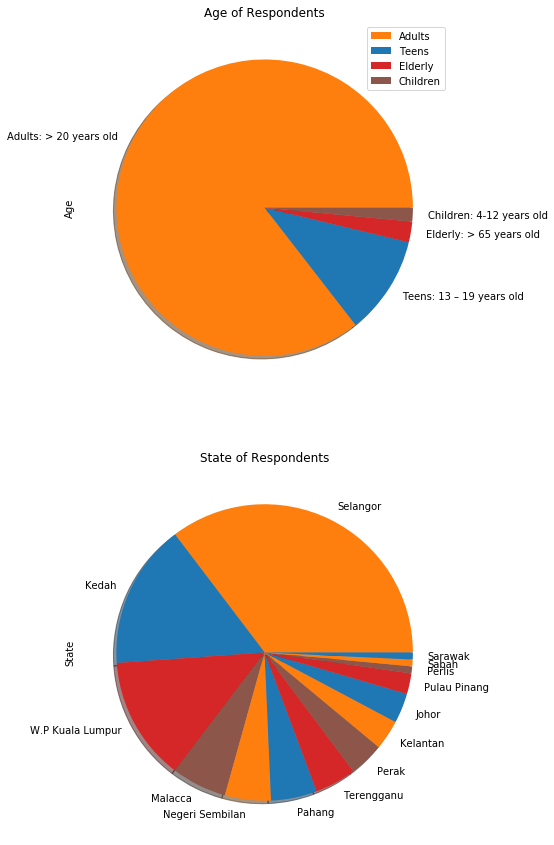

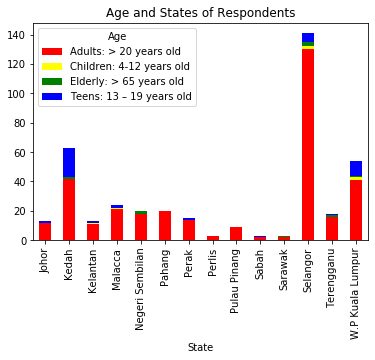

In [6]:
colors = ["#ff7f0e","#1f77b4","#d62728", "#8c564b"]
plt.subplot(2,1,1)
df['Age'].value_counts().plot(kind='pie', figsize=(15,15),colors=colors, shadow=True)
plt.title("Age of Respondents")
plt.legend(["Adults","Teens","Elderly","Children"])

plt.subplot(2,1,2)
df['State'].value_counts().plot(kind='pie', figsize=(15,15),colors=colors, shadow=True)
plt.title("State of Respondents")

temp3 = pd.crosstab(df['State'], df['Age'])
temp3.plot(kind='bar', stacked=True, color=['red','yellow','green','blue'], grid=False)
plt.title("Age and States of Respondents")


<b> The graph shows the states and age of respondents that answered the survey, from the graph it can be observed that most of the respondents are >20 years old adults and came from Selangor and Kedah </b>

In [7]:
temp1 = df['Gender'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Class_label',index=['Gender'],aggfunc=lambda x: x.map({'Yes':0,'No':1}).mean())
print ('Frequency Table for Gender of Respondents') 
print (temp1)
print ('\nProbility of getting mental disorder for each Gender class:')
print (temp2)

Frequency Table for Gender of Respondents
Male      187
Female    213
Name: Gender, dtype: int64

Probility of getting mental disorder for each Gender class:
        Class_label
Gender             
Female     0.706161
Male       0.706522


<b> The total number of respondents is 187 males and 213 females for the training data, as seen above, both females and males are equally likely to experience mental disorder </b>

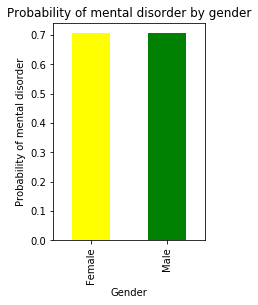

In [8]:
x = pd.Series(temp2['Class_label'])
plt.subplot(1,2,2)
plt.xlabel('Gender')
plt.ylabel('Probability of mental disorder')
plt.title("Probability of mental disorder by gender")
x.plot(kind = 'bar',color=['Yellow','Green'])

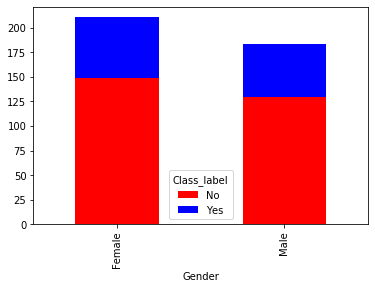

In [9]:
temp3 = pd.crosstab(df['Gender'], df['Class_label'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

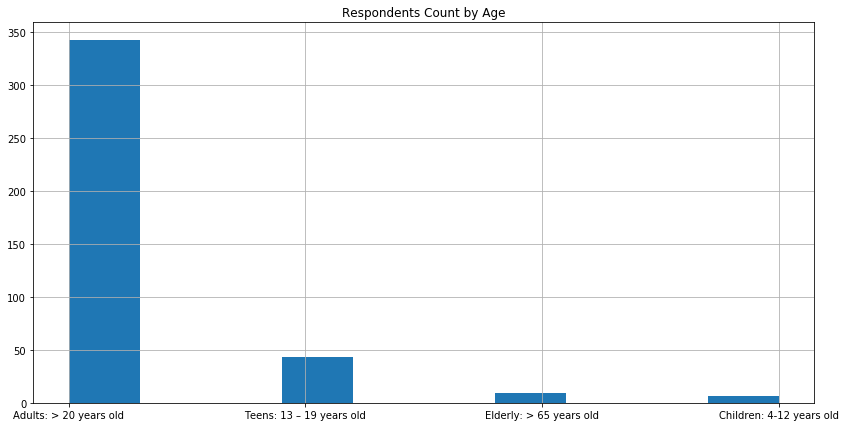

In [10]:
plt.figure(figsize=(14,7))
plt.title("Respondents Count by Age")
df['Age'].hist(bins=10)

<b> From the graph above, it is concluded that most of the respondents are adults with age >20 years old </b>

Text(0.5, 1.0, 'Marital Status of Respondents')

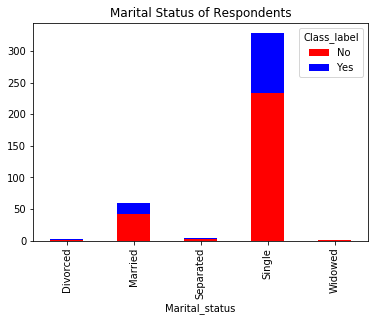

In [11]:
temp3 = pd.crosstab(df['Marital_status'], df['Class_label'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title("Marital Status of Respondents")

<b> From the graph above, it can be observed that single people are more likely to experience mental disorders  </b>

In [12]:
# To report missing data
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                  1
Gender               1
State                2
Education_level      3
Employment_status    1
Marital_status       1
Intake_sweet         5
Intake_salty         5
Intake_fruit         3
Intake_vegetables    8
Exercise             2
Early_symptoms       3
History_family       3
Class_label          6
dtype: int64

<b> From the above code, the missing data is identified </b>

# Data Cleansing

In [13]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Education_level'].fillna(df['Education_level'].mode()[0], inplace=True)
df['Employment_status'].fillna(df['Employment_status'].mode()[0], inplace=True)
df['Marital_status'].fillna(df['Marital_status'].mode()[0], inplace=True)
df['Intake_sweet'].fillna(df['Intake_sweet'].mode()[0], inplace=True)
df['Intake_salty'].fillna(df['Intake_salty'].mode()[0], inplace=True)
df['Intake_fruit'].fillna(df['Intake_fruit'].mode()[0], inplace=True)
df['Intake_vegetables'].fillna(df['Intake_vegetables'].mode()[0], inplace=True)
df['Exercise'].fillna(df['Exercise'].mode()[0], inplace=True)
df['Early_symptoms'].fillna(df['Early_symptoms'].mode()[0], inplace=True)
df['History_family'].fillna('No',inplace=True)
df['Class_label'].fillna('No',inplace=True)

In [14]:
# Recheck missing data
df.apply(lambda x: sum(x.isnull()),axis=0) 

Age                  0
Gender               0
State                0
Education_level      0
Employment_status    0
Marital_status       0
Intake_sweet         0
Intake_salty         0
Intake_fruit         0
Intake_vegetables    0
Exercise             0
Early_symptoms       0
History_family       0
Class_label          0
dtype: int64

# Data Transformation

In [15]:
# Convert to numerical
var_mod = ['Age','Gender','State','Education_level','Employment_status','Marital_status','Intake_sweet','Intake_salty','Intake_fruit','Intake_vegetables', 'Exercise','Early_symptoms','History_family','Class_label']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes
df.head(400)

,Age,Gender,State,Education_level,Employment_status,Marital_status,Intake_sweet,Intake_salty,Intake_fruit,Intake_vegetables,Exercise,Early_symptoms,History_family,Class_label
0,0,0,13,1,1,3,0,4,0,4,2,1,0,0
1,0,0,11,1,1,3,4,4,4,4,3,1,0,0
2,0,0,11,1,1,3,4,4,2,2,2,1,0,0
3,0,1,11,1,1,3,3,0,0,1,4,1,0,0
4,0,1,3,1,2,3,2,2,2,3,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,5,1,1,3,3,3,4,4,5,1,0,1
396,0,0,11,1,0,1,3,2,4,4,5,0,1,0
397,0,1,5,1,4,1,3,3,2,2,0,0,0,0
398,0,1,13,1,0,1,2,2,2,4,5,1,1,1


In [16]:
df.iloc[:, 1:12]
df.loc[:, ['Class_label']]

,Class_label
0,0
1,0
2,0
3,0
4,0
...,...
396,0
397,0
398,1
399,0


Text(0.5, 1.0, 'Status')

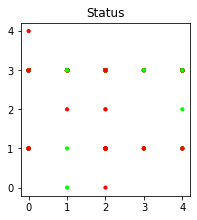

In [17]:
x = df.iloc[:, 1:12]
y = df.loc[:, ['Class_label']]
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(2, 4, 2)
plt.scatter(x.Employment_status, x.Marital_status, c=colormap[y.Class_label], s=10)
plt.title('Status')

# Modelling and Features Selection

In [18]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=2, p=2, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0.5, 1.0, 'Status: Real classification')

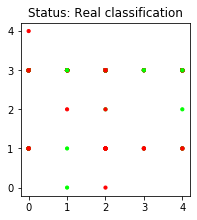

In [19]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(2, 4, 2)
plt.scatter(x.Employment_status, x.Marital_status, c=colormap[y.Class_label], s=10)
plt.title('Status: Real classification')

Text(0.5, 1.0, 'Status: K-NN Classification')

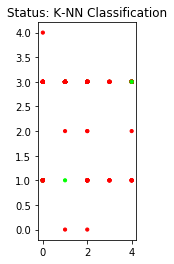

In [20]:
plt.subplot(1, 3, 3)
plt.scatter(x.Employment_status, x.Marital_status, c=colormap[yPred], s=10)
plt.title('Status: K-NN Classification')

# Testing & performance analysis: Training data

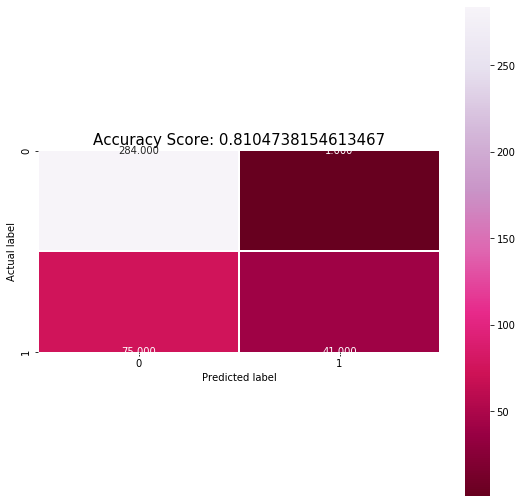

In [21]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

In [22]:
print(classification_report(y,yPred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       285
           1       0.98      0.35      0.52       116

    accuracy                           0.81       401
   macro avg       0.88      0.67      0.70       401
weighted avg       0.84      0.81      0.78       401



In [23]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


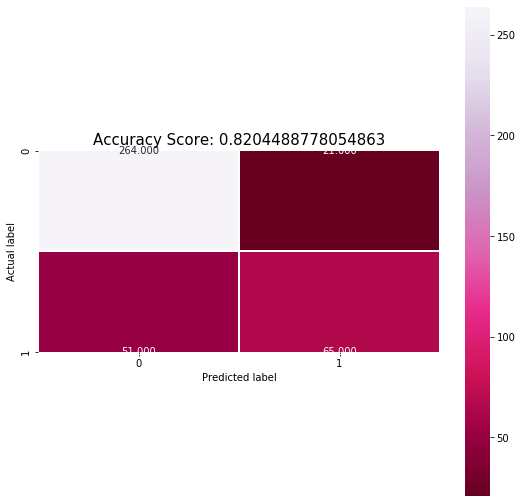

In [24]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

In [25]:
print(classification_report(y,yPred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       285
           1       0.76      0.56      0.64       116

    accuracy                           0.82       401
   macro avg       0.80      0.74      0.76       401
weighted avg       0.81      0.82      0.81       401



In [26]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


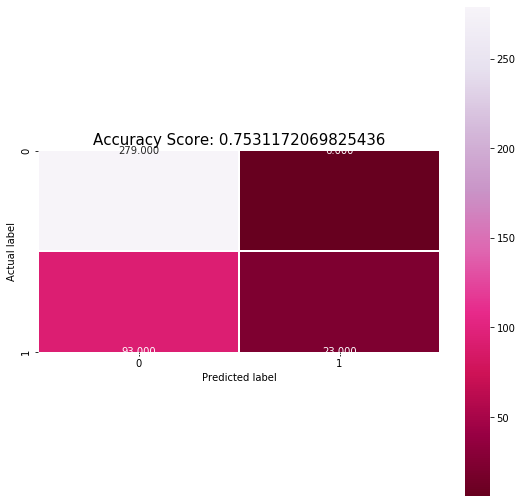

In [27]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

In [28]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=2, p=2, weights='distance')
model.fit(x, y)
yPred = model.predict(x)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0.5, 1.0, 'Status: K-NN Classification')

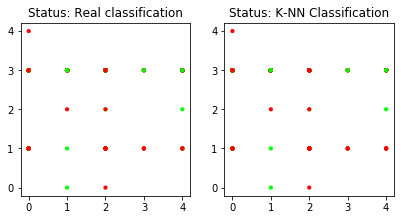

In [29]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])

# Plot the Original Classifications
plt.subplot(2, 4, 2)
plt.scatter(x.Employment_status, x.Marital_status, c=colormap[y.Class_label], s=10)
plt.title('Status: Real classification')

# Plot the Models Classifications
plt.subplot(2, 4, 3)
plt.scatter(x.Employment_status, x.Marital_status, c=colormap[yPred], s=10)
plt.title('Status: K-NN Classification')

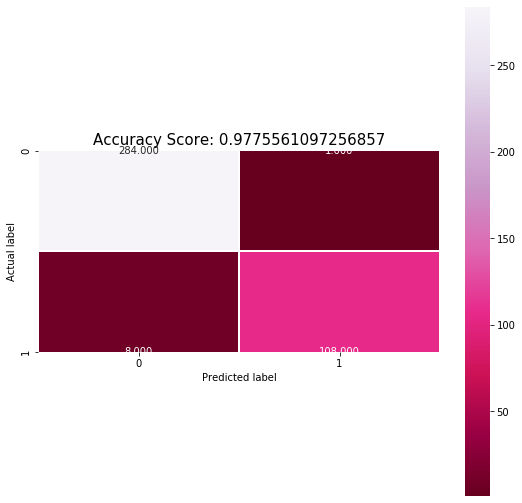

In [30]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

In [31]:
print(classification_report(y,yPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.99      0.93      0.96       116

    accuracy                           0.98       401
   macro avg       0.98      0.96      0.97       401
weighted avg       0.98      0.98      0.98       401



# Testing & performance analysis: Testing data

In [32]:
df2 = pd.read_csv("TestData.csv")
df2.head()

,Age,Gender,State,Education_level,Employment_status,Marital_status,Intake_sweet,Intake_salty,Intake_fruit,Intake_vegetables,Exercise,Early_symptoms,History_family,Class_label
0,Adults: > 20 years old,Female,Negeri Sembilan,"Post-secondary or tertiary (diploma, graduate,...",Seeking employment,Married,Several times a day,Several times a week,Several times a week,Several times a day,Never,Yes,Yes,Yes
1,Adults: > 20 years old,Female,Selangor,"Post-secondary or tertiary (diploma, graduate,...",Full-time employment,Single,Several times a day,Never,Once a day,Several times a day,Once a week,Yes,No,No
2,Adults: > 20 years old,Female,Selangor,"Post-secondary or tertiary (diploma, graduate,...",Others (Student / Pursuing further studies),Single,Several times a day,Several times a week,Several times a day,Several times a day,Never,Yes,No,No
3,Adults: > 20 years old,Female,W.P Kuala Lumpur,"Post-secondary or tertiary (diploma, graduate,...",Seeking employment,Married,Several times a week,Once a day,Several times a week,Several times a week,Once a week,Yes,No,Yes
4,Teens: 13 – 19 years old,Male,W.P Kuala Lumpur,Secondary,Others (Student / Pursuing further studies),Single,Several times a day,Once a day,Several times a week,Several times a week,Once a week,Yes,No,No


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
Age                  102 non-null object
Gender               102 non-null object
State                101 non-null object
Education_level      102 non-null object
Employment_status    102 non-null object
Marital_status       102 non-null object
Intake_sweet         102 non-null object
Intake_salty         101 non-null object
Intake_fruit         102 non-null object
Intake_vegetables    101 non-null object
Exercise             102 non-null object
Early_symptoms       101 non-null object
History_family       102 non-null object
Class_label          102 non-null object
dtypes: object(14)
memory usage: 11.3+ KB


In [34]:
df2['Age'].fillna(df2['Age'].mode()[0], inplace=True)
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace=True)
df2['State'].fillna(df2['State'].mode()[0], inplace=True)
df2['Education_level'].fillna(df2['Education_level'].mode()[0], inplace=True)
df2['Employment_status'].fillna(df2['Employment_status'].mode()[0], inplace=True)
df2['Marital_status'].fillna(df2['Marital_status'].mode()[0], inplace=True)
df2['Intake_sweet'].fillna(df2['Intake_sweet'].mode()[0], inplace=True)
df2['Intake_salty'].fillna(df2['Intake_salty'].mode()[0], inplace=True)
df2['Intake_fruit'].fillna(df2['Intake_fruit'].mode()[0], inplace=True)
df2['Intake_vegetables'].fillna(df2['Intake_vegetables'].mode()[0], inplace=True)
df2['Exercise'].fillna(df2['Exercise'].mode()[0], inplace=True)
df2['Early_symptoms'].fillna(df2['Early_symptoms'].mode()[0], inplace=True)
df2['History_family'].fillna('No',inplace=True)
df2['Class_label'].fillna('No',inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
Age                  102 non-null object
Gender               102 non-null object
State                102 non-null object
Education_level      102 non-null object
Employment_status    102 non-null object
Marital_status       102 non-null object
Intake_sweet         102 non-null object
Intake_salty         102 non-null object
Intake_fruit         102 non-null object
Intake_vegetables    102 non-null object
Exercise             102 non-null object
Early_symptoms       102 non-null object
History_family       102 non-null object
Class_label          102 non-null object
dtypes: object(14)
memory usage: 11.3+ KB


In [36]:
var_mod2 = ['Age','Gender','State','Education_level','Employment_status','Marital_status','Intake_sweet','Intake_salty','Intake_fruit','Intake_vegetables', 'Exercise','Early_symptoms','History_family','Class_label']
le2 = LabelEncoder()
for i in var_mod2:
    df2[i] = le2.fit_transform(df2[i])
df2.dtypes
df2.head()

,Age,Gender,State,Education_level,Employment_status,Marital_status,Intake_sweet,Intake_salty,Intake_fruit,Intake_vegetables,Exercise,Early_symptoms,History_family,Class_label
0,0,0,4,0,2,1,2,4,4,3,3,1,1,1
1,0,0,10,0,0,3,2,1,2,3,4,1,0,0
2,0,0,10,0,1,3,2,4,3,3,3,1,0,0
3,0,0,12,0,2,1,3,2,4,4,4,1,0,1
4,3,1,12,2,1,3,2,2,4,4,4,1,0,0


In [37]:
x2 = df2.iloc[:, 1:12]
y2 = df2.loc[:, ['Class_label']]
yPred2 = model.predict(x2)

Text(0.5, 1.0, 'Status: K-NN Classification')

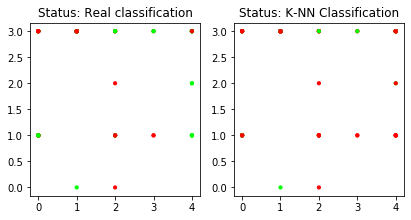

In [38]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])

# Plot the Original Classifications
plt.subplot(2, 4, 2)
plt.scatter(x2.Employment_status, x2.Marital_status, c=colormap[y2.Class_label], s=10)
plt.title('Status: Real classification')

# Plot the Models Classifications
plt.subplot(2, 4, 3)
plt.scatter(x2.Employment_status, x2.Marital_status, c=colormap[yPred2], s=10)
plt.title('Status: K-NN Classification')


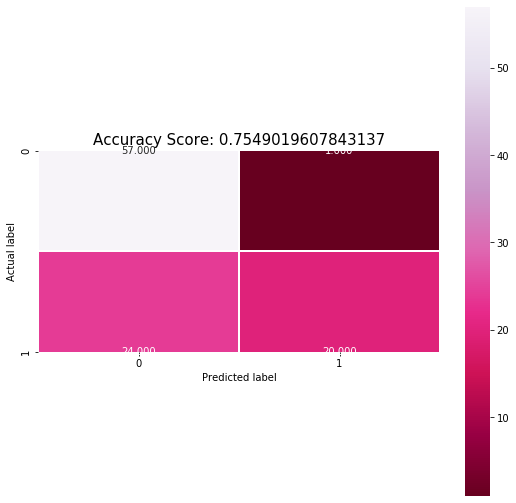

In [39]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15);

In [40]:
print(classification_report(y2,yPred2))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        58
           1       0.95      0.45      0.62        44

    accuracy                           0.75       102
   macro avg       0.83      0.72      0.72       102
weighted avg       0.81      0.75      0.73       102

